# Ames Housing Prices - Data Cleaning and Processing

In [249]:
#Import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Read in training data
data = pd.read_csv('../datasets/train.csv')

#Allows viewing of all variables in Pandas
pd.set_option('max_columns',82)

#View data
data.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,

In [250]:
#There are 2051 properties in the training set, and 81 variables including the target, sale price.
data.shape

(2051, 81)

In [194]:
#Review data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

First I convert nominal variables with no null values into dummies.  
- Nominal variables with NaNs will be examined later: 'Mas Vnr Type','Garage Type','Misc Feature'
- 'PID' is listed as a nominal variable in the data dictionary, but has a strong negative correlation with SalePrice by number, possibly due to how the city is processing these ID numbers.  So I am going to regard it as a discrete variable instead.

In [195]:
#Creating a new column in case I want to use the original neighborhood column later on
data['Neighborhood_dummies'] = data['Neighborhood']

In [196]:
#One-hot encode all nominal variables with no null values
data = pd.get_dummies(data, columns=['MS SubClass',
                                     'MS Zoning',
                                     'Street',
                                     'Land Contour',
                                     'Condition 1',
                                     'Condition 2',
                                     'House Style',
                                     'Lot Config',
                                     'Bldg Type',
                                     'Neighborhood_dummies',
                                     'Roof Style',
                                     'Roof Matl',
                                     'Exterior 1st',
                                     'Exterior 2nd', 
                                     'Foundation', 
                                     'Heating', 
                                     'Central Air',
                                     'Sale Type'], 
                      drop_first=True)

In [197]:
#We now have over 200 variables
data.shape

(2051, 202)

Next I'll look at ordinal variables. Most discrete and continuous variables appear good to use as they are, provided they have no null values.  For ordinal variables, 'Overall Cond' and 'Overall Qual' are ints with no null values that are good to use as they are.  

These are the variables that will require further examination, for one reason or another:

Continuous:

- Lot Frontage       1721 non-null float64
- BsmtFin SF 1       2050 non-null float64
- BsmtFin SF 2       2050 non-null float64
- Bsmt Unf SF        2050 non-null float64
- Total Bsmt SF      2050 non-null float64
- Garage Area        2050 non-null float64


Discrete:

- Bsmt Full Bath     2049 non-null float64
- Bsmt Half Bath     2049 non-null 
- Garage Yr Blt      1937 non-null float64
- Garage Cars        2050 non-null float64
- Mo Sold            2051 non-null int64


Ordinal:

- Lot Shape          2051 non-null object
- Utilities          2051 non-null object
- Land Slope         2051 non-null object
- Exter Qual         2051 non-null object
- Exter Cond         2051 non-null object
- Bsmt Qual          1996 non-null object
- Bsmt Cond          1996 non-null object
- Bsmt Exposure      1993 non-null object
- BsmtFin Type 1     1996 non-null object
- BsmtFin Type 2     1995 non-null object
- Heating QC         2051 non-null object
- Electrical         2051 non-null object
- Kitchen Qual       2051 non-null object
- Functional         2051 non-null object
- Fireplace Qu       1051 non-null object
- Garage Finish      1937 non-null object
- Garage Qual        1937 non-null object
- Garage Cond        1937 non-null object
- Paved Drive        2051 non-null object
- Pool QC            9 non-null object
- Fence              400 non-null object


Nominal:

- Alley              140 non-null object
- House Style        2051 non-null object
- Mas Vnr Type       2029 non-null object
- Mas Vnr Area       2029 non-null float64
- Garage Type        1938 non-null object
- Misc Feature       65 non-null object


### Continuous Variables Editing

In [198]:
data[data['BsmtFin SF 1'].isnull()==True]

,Id,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1327,1342,903230120,99.0,5940,NaN,IR1,AllPub,Gtl,BrkSide,4,7,1946,1950,None,0.0,TA,TA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [199]:
#Removes the one row with null value in 'BsmtFin SF 1'
for i in data[data['BsmtFin SF 1'].isnull()==True].loc[:,'Id']:
    data = data[data['Id']!=i]

In [200]:
data[data['Garage Area'].isnull()==True]

,Id,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1712,2237,910201180,50.0,9060,NaN,Reg,AllPub,Gtl,IDOTRR,5,6,1923,1999,None,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,Ex,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [201]:
#Removes the one row with null value in 'Garage Area'
for i in data[data['Garage Area'].isnull()==True].loc[:,'Id']:
    data = data[data['Id']!=i]

### Discrete Variables Editing

In [202]:
data[data['Bsmt Full Bath'].isnull()==True]

,Id,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
616,1498,908154080,123.0,47007,NaN,IR1,AllPub,Gtl,Edwards,5,7,1959,1996,None,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [203]:
#We have already removed one of the rows that is missing 'Bsmt Full Bath' and 'Bsmt Half Bath'
#Removes this row as well, which is missing both of these, to resolve both those vars.
for i in data[data['Bsmt Full Bath'].isnull()==True].loc[:,'Id']:
    data = data[data['Id']!=i]

In [204]:
#We have already removed the row that was causing an issue with 'Garage Cars':
data[data['Garage Cars'].isnull()==True]

,Id,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,...,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD


The month sold variable is essentially categorical.  I am going to create a 'Season' variable, and then also get dummies for the individual months.

In [205]:
#Creates variable for season of sale from month of sale variable
seasons = {
    'Spring':[3,4,5],
    'Summer':[6,7,8],
    'Fall':[9,10,11],
    'Winter':[12,1,2]
}

data['Season'] = data['Mo Sold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])

In [206]:
#Gets dummies for month and season of sale
data = pd.get_dummies(data, columns=['Season'],drop_first=True)
data = pd.get_dummies(data, columns=['Mo Sold'], drop_first=True)

### Ordinal Variables Editing

First we will look at all ordinal variables that had no missing values.

In [207]:
#Lot Shape will be assigned numeric values according to irregularity (0,1,2,3)
data['Lot Shape'] = data['Lot Shape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [208]:
data['Utilities'].value_counts()

AllPub    2046
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [209]:
#This seems somewhat negligible, but it may as well be included
data['Utilities'] = data['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})

In [210]:
data['Land Slope'].value_counts()

Gtl    1950
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [211]:
#Gtl is basically the reference, there is no flat.  So we will call this 0,1,2.
data['Land Slope'] = data['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':2})

In [212]:
data['Exter Qual'].value_counts()

TA    1244
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [213]:
data['Exter Cond'].value_counts()

TA    1775
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [214]:
data['Heating QC'].value_counts()

Ex    1064
TA     595
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [215]:
data['Kitchen Qual'].value_counts()

TA    1046
Gd     805
Ex     150
Fa      47
Name: Kitchen Qual, dtype: int64

In [216]:
#These four variables follow the same scale.  Notice the average condition is the majority in most cases. 
#The appropriate match here to me is -4, -1, 0, 1, 4.  The idea is that Excellent or Poor have a larger than proportional impact.
for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
    data[i] = data[i].map({'Ex':4,'Gd':1,'TA':0,'Fa':-1,'Po':-4})

In [217]:
data['Heating QC'] = data['Heating QC'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-2,'Po':-4})

In [218]:
for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
    data[i+' 2'] = data[i].map({4:2,1:1,0:0,-1:-1,-4:-2})

In [219]:
data['Electrical'].value_counts()

SBrkr    1866
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [220]:
data['Electrical'] = data['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})

In [221]:
data['Electrical'].value_counts()

0.0    1866
1.0     139
2.0      35
3.0       7
1.5       1
Name: Electrical, dtype: int64

In [222]:
data['Functional'].value_counts()

Typ     1912
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [223]:
data['Functional'] = data['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})

In [224]:
data['Paved Drive'].value_counts()

Y    1858
N     151
P      39
Name: Paved Drive, dtype: int64

In [225]:
data['Paved Drive'] = data['Paved Drive'].map({'N':0,'P':1,'Y':2})

### Garage Data Imputation

In [226]:
#Next we will deal with Garage Finish, Garage Qual and Garage Cond by looking at them together.  
#We will also deal with the discrete variable 'Garage Year Blt' and the nominal variable 'Garage Type'
#All of these show 1937 non-null objects out of the original 2051 rows.

missing_garage_data = data[data['Garage Finish'].isnull()==True]
missing_garage_data[['Garage Area','Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Qual','Garage Cond']].head(10)

,Garage Area,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond
28,0.0,NaN,NaN,NaN,0.0,NaN,NaN
53,0.0,NaN,NaN,NaN,0.0,NaN,NaN
65,0.0,NaN,NaN,NaN,0.0,NaN,NaN
79,0.0,NaN,NaN,NaN,0.0,NaN,NaN
101,0.0,NaN,NaN,NaN,0.0,NaN,NaN
103,0.0,NaN,NaN,NaN,0.0,NaN,NaN
114,0.0,NaN,NaN,NaN,0.0,NaN,NaN
120,0.0,NaN,NaN,NaN,0.0,NaN,NaN
134,0.0,NaN,NaN,NaN,0.0,NaN,NaN
136,0.0,NaN,NaN,NaN,0.0,NaN,NaN


What we see here is that these NaNs just represent houses without garages.  So we should be able to impute fairly easily.

In [227]:
data['Garage Type'] = data['Garage Type'].fillna('None')
data['Garage Finish'] = data['Garage Finish'].fillna('None')
data['Garage Qual'] = data['Garage Qual'].fillna('None')
data['Garage Cond'] = data['Garage Cond'].fillna('None')

#Nominal variable 'Garage Type' goes to dummies
data = pd.get_dummies(data, columns=['Garage Type'], drop_first=True)

data['Garage Finish'] = data['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

data['Garage Qual'] = data['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
data['Garage Cond'] = data['Garage Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

#Here I will impute the year house built for year garage built NaNs:
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(data['Year Built'])

### Basement Data Imputation

In [228]:
#Now we look at the subgroup of Basement related variables with approximately 1995 non-nulls
missing_bsmt_data = data[data['Bsmt Exposure'].isnull()==True]
missing_bsmt_data[['Bsmt Exposure','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','BsmtFin SF 1']].head(10)

,Bsmt Exposure,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,BsmtFin SF 1
12,NaN,NaN,NaN,NaN,NaN,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0


Again we can see that these are just non-basement homes.  Same type of thing should apply as with garages.

In [229]:
for i in ['Bsmt Exposure','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2']:
    data[i] = data[i].fillna('None')

#Bsmt Qual and Bsmt Cond mimic the early variables on this scale.  I've weighted this and the garage version differently due to perceived impact.
#A basement or garage is considered an extra amenity relative to 0.  A functional heating system is regarded as state 0.
data['Bsmt Qual'] = data['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
data['Bsmt Cond'] = data['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

data['BsmtFin Type 1'] = data['BsmtFin Type 1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
data['BsmtFin Type 2'] = data['BsmtFin Type 2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})

data['Bsmt Exposure'] = data['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

### Fireplaces, Pools, Fences

In [230]:
#Looking at Fireplace, Pool and Fence quality next:
data['Fireplace Qu'] = data['Fireplace Qu'].fillna('None')
data['Fireplace Qu'] = data['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

data['Pool QC'] = data['Pool QC'].fillna('None')
data['Pool QC'] = data['Pool QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0})

data['Fence'] = data['Fence'].fillna('None')
data['Fence'] = data['Fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})

### Nominal Variables, Editing

In [231]:
#Convert existing Alley column into a dummy for Yes/No on Alley, and dummies for gravel alley and paved alley
data['Alley'] = data['Alley'].fillna(0)
data['Alley Grvl'] = data['Alley'].map(lambda x: 1 if x=='Grvl' else 0)
data['Alley Pave'] = data['Alley'].map(lambda x: 1 if x=='Pave' else 0)
data['Alley'] = data['Alley'].map(lambda x: 1 if x!=0 else 0)

#Miscellaneous dummy creation/imputation for nominal variables:
data = pd.get_dummies(data, columns=['Misc Feature'])

data['Mas Vnr Type'] = data['Mas Vnr Type'].fillna('None')
data = pd.get_dummies(data, columns=['Mas Vnr Type'])
data.drop('Mas Vnr Type_None',axis=1,inplace=True)

data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)

### Lot Frontage Imputation

In [232]:
#For Lot Frontage, there are a large number of null values, and 0 is a senseless value for this.
#One approach would be to map in the average overall lot frontage mean for all the nans.
#However, a more accurate approach may be to map in the mean lot frontage for the neighborhood of each house.
neighborhood_means = data.groupby('Neighborhood')['Lot Frontage'].mean()

In [233]:
neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))

In [234]:
neighborhood_means.head()

Neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    55.739130
ClearCr    92.500000
Name: Lot Frontage, dtype: float64

In [235]:
data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Neighborhood'])

In [236]:
data['Lot Frontage'] = data['Lot Frontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)

In [237]:
#dropping neighborhood because no longer needed
data.drop('Neighborhood',axis=1,inplace=True)

### Final Steps

In [238]:
#confirm no more missing values
data.isnull().sum().sum()

0

In [239]:
#Drop all features that have no predictive value because they do not apply to any houses in the training set
data.drop(['MS SubClass_150',
           'MS Zoning_C (all)',
           'Condition 2_Feedr',
           'Condition 2_RRAe',
           'Condition 2_RRAn',
           'Condition 2_RRNn',
           'Neighborhood_dummies_GrnHill',   
           'Neighborhood_dummies_Landmrk',
           'Exterior 1st_CBlock',
           'Exterior 1st_ImStucc',
           'Exterior 1st_Stone',
           'Exterior 2nd_Stone',
           'Heating_Wall',
           'Misc Feature_TenC',
           'Misc Feature_Elev',
           'Roof Matl_CompShg',
           'Roof Matl_Membran'],
           axis=1,inplace=True)

In [240]:
#Set viewing limit to allow viewing of all variables
pd.set_option('max_columns',250)

In [241]:
#215 Variables after this stage.  2048 of the original 2051 houses have been retained.
data.shape

(2048, 213)

In [242]:
data.head()

,Id,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Yr Sold,SalePrice,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Neighborhood_dummies_Blueste,Neighborhood_dummies_BrDale,Neighborhood_dummies_BrkSide,Neighborhood_dummies_ClearCr,Neighborhood_dummies_CollgCr,Neighborhood_dummies_Crawfor,Neighborhood_dummies_Edwards,Neighborhood_dummies_Gilbert,Neighborhood_dummies_Greens,Neighborhood_dummies_IDOTRR,Neighborhood_dummies_MeadowV,Neighborhood_dummies_Mitchel,Neighborhood_dummies_NAmes,Neighborhood_dummies_NPkVill,Neighborhood_dummies_NWAmes,Neighborhood_dummies_NoRidge,Neighborhood_dummies_NridgHt,Neighborhood_dummies_OldTown,Neighborhood_dummies_SWISU,Neighborhood_dummies_Sawyer,Neighborhood_dummies_SawyerW,Neighborhood_dummies_Somerst,Neighborhood_dummies_StoneBr,Neighborhood_dummies_Timber,Neighborhood_dummies_Veenker,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Season_Spring,Season_Summer,Season_Winter,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Exter Qual 2,Exter Cond 2,Kitchen Qual 2,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Alley Grvl,Alley Pave,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone
0,109,533352170,72.774648,13517,0,1,0,0,6,8,1976,2005,289.0,1,0,2.5,2.5,0,4.0,533.0,1.5,0.0,192.0,725.0,2,0.0,725,754,0,1479,0.0,0.0,2,1,3,1,1,6,0,0,0.0,1976.0,2,2.0,475.0,2.5,2.5,2,0,44,0,0,0,0,0,0,0,2010,130500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

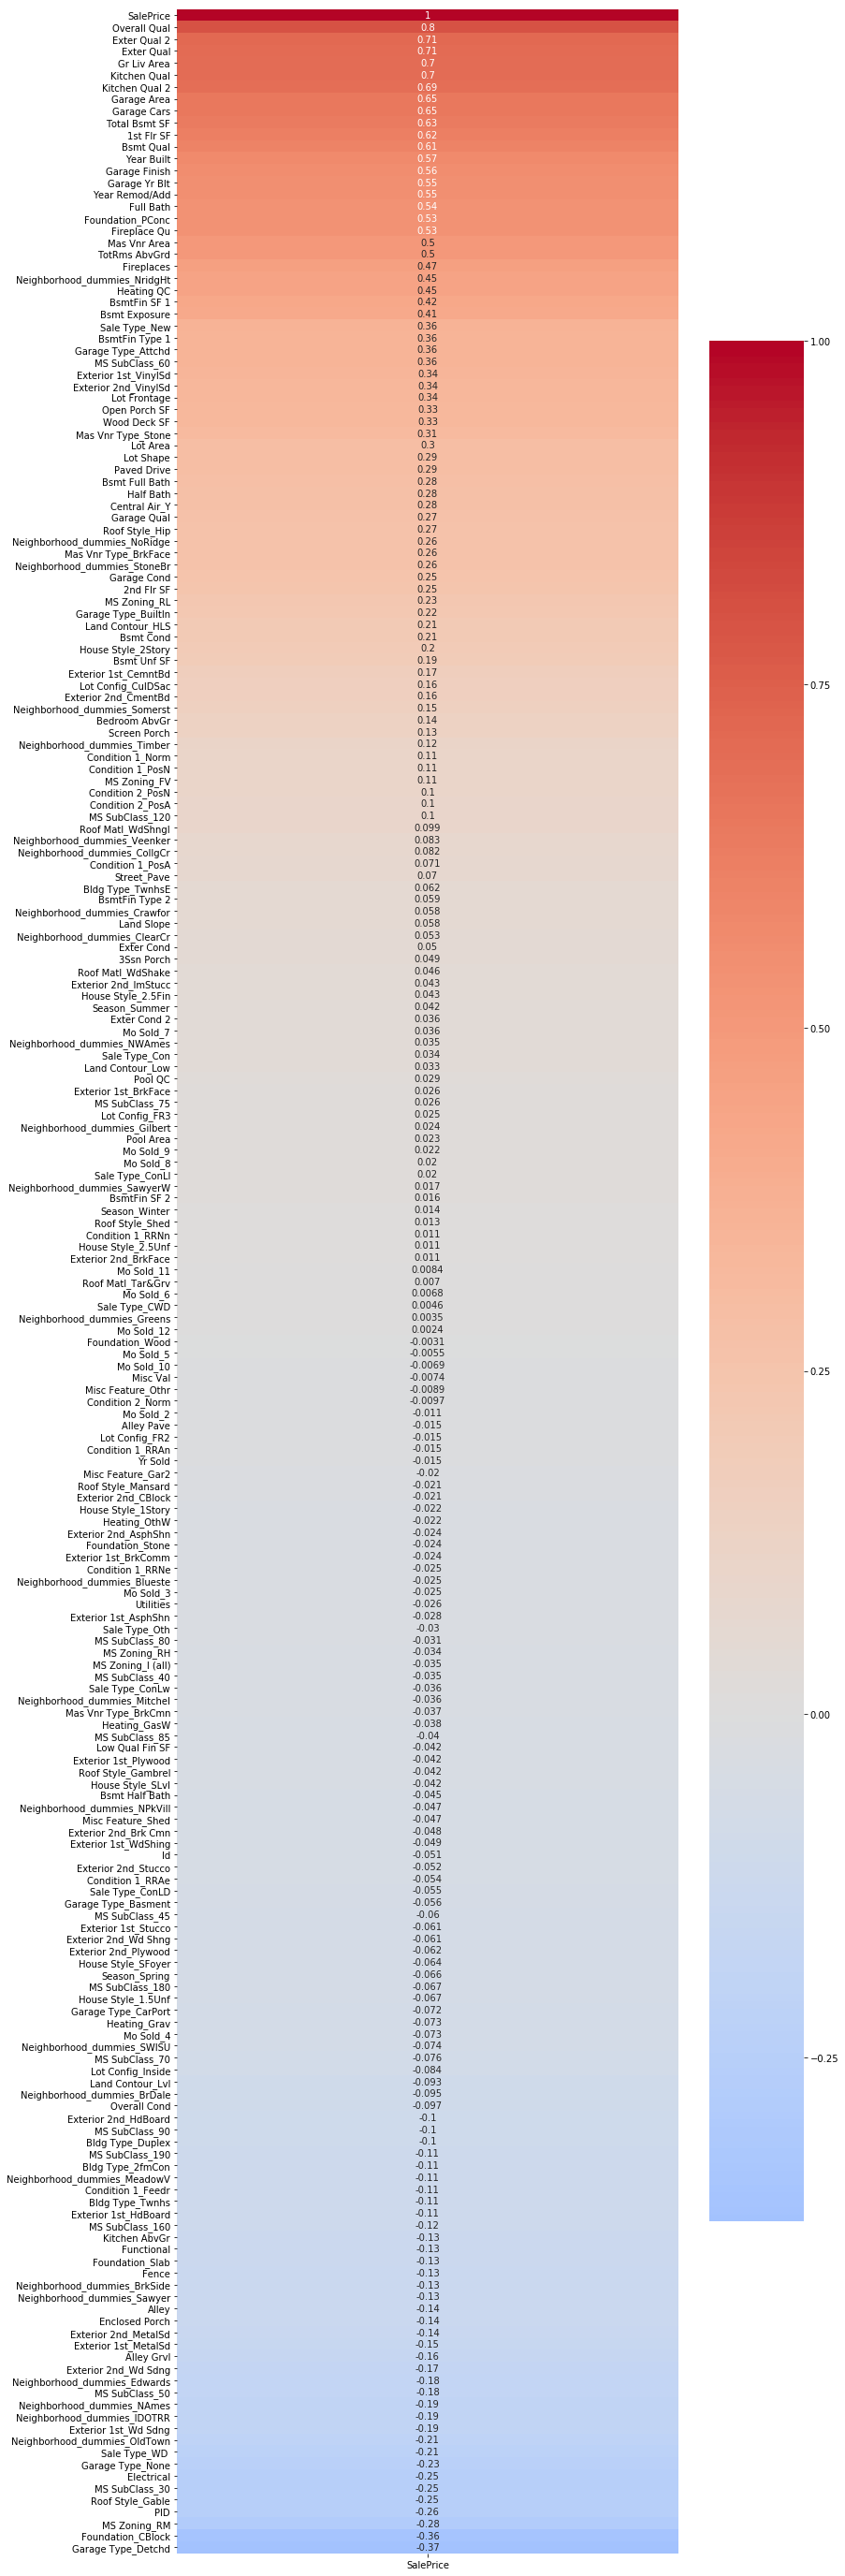

In [243]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(data.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True, cmap='coolwarm', center=0);

In [244]:
#Saves processed training data
data.to_csv('../datasets/data_clean_final.csv', index=False)

## Applying Changes to Test Data

Any processing changes that we make to training data need to be mirrored on test data before generating predictions.  The code below accomplishes that.

In [245]:
#Import test data
testset = pd.read_csv('../datasets/test.csv')

#Check size of test set.  We see there are 879 houses in the test set.
testset.shape

(879, 80)

In [246]:
#This code defines a function that can be edited as necessary, 
#that applies all data processing changes to new test data.

def changes_to_dataframe(data):
    data['Neighborhood_dummies'] = data['Neighborhood']
    
    data = pd.get_dummies(data, columns=['MS SubClass',
                                     'MS Zoning',
                                     'Street',
                                     'Land Contour',
                                     'Condition 1',
                                     'Condition 2',
                                     'House Style',
                                     'Lot Config',
                                     'Bldg Type',
                                     'Neighborhood_dummies',
                                     'Roof Style',
                                     'Roof Matl',
                                     'Exterior 1st',
                                     'Exterior 2nd', 
                                     'Foundation', 
                                     'Heating', 
                                     'Central Air',
                                     'Sale Type'], 
                      drop_first=True)
    
    for i in data[data['BsmtFin SF 1'].isnull()==True].loc[:,'Id']:
        data = data[data['Id']!=i]
    for i in data[data['Garage Area'].isnull()==True].loc[:,'Id']:
        data = data[data['Id']!=i]
    for i in data[data['Bsmt Full Bath'].isnull()==True].loc[:,'Id']:
        data = data[data['Id']!=i]
       
    seasons = {'Spring':[3,4,5],'Summer':[6,7,8],'Fall':[9,10,11],'Winter':[12,1,2]}
    data['Season'] = data['Mo Sold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])
    data = pd.get_dummies(data, columns=['Season'],drop_first=True)
    data = pd.get_dummies(data, columns=['Mo Sold'], drop_first=True)
    data['Lot Shape'] = data['Lot Shape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
    data['Utilities'] = data['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})
    data['Land Slope'] = data['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':2})
    for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
        data[i] = data[i].map({'Ex':4,'Gd':1,'TA':0,'Fa':-1,'Po':-4})
    data['Heating QC'] = data['Heating QC'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-2,'Po':-4})
    for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
        data[i+' 2'] = data[i].map({4:2,1:1,0:0,-1:-1,-4:-2})
    data['Electrical'] = data['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})
    data['Functional'] = data['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
    data['Paved Drive'] = data['Paved Drive'].map({'N':0,'P':1,'Y':2})
    data['Garage Type'] = data['Garage Type'].fillna('None')
    data['Garage Finish'] = data['Garage Finish'].fillna('None')
    data['Garage Qual'] = data['Garage Qual'].fillna('None')
    data['Garage Cond'] = data['Garage Cond'].fillna('None')
    data = pd.get_dummies(data, columns=['Garage Type'], drop_first=True)
    data['Garage Finish'] = data['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
    data['Garage Qual'] = data['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Garage Cond'] = data['Garage Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(data['Year Built'])
    for i in ['Bsmt Exposure','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2']:
        data[i] = data[i].fillna('None')
    data['Bsmt Qual'] = data['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Bsmt Cond'] = data['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['BsmtFin Type 1'] = data['BsmtFin Type 1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
    data['BsmtFin Type 2'] = data['BsmtFin Type 2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
    data['Bsmt Exposure'] = data['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
    data['Fireplace Qu'] = data['Fireplace Qu'].fillna('None')
    data['Fireplace Qu'] = data['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
    data['Pool QC'] = data['Pool QC'].fillna('None')
    data['Pool QC'] = data['Pool QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0})
    data['Fence'] = data['Fence'].fillna('None')
    data['Fence'] = data['Fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})
    data['Alley'] = data['Alley'].fillna(0)
    data['Alley Grvl'] = data['Alley'].map(lambda x: 1 if x=='Grvl' else 0)
    data['Alley Pave'] = data['Alley'].map(lambda x: 1 if x=='Pave' else 0)
    data['Alley'] = data['Alley'].map(lambda x: 1 if x!=0 else 0)
    data = pd.get_dummies(data, columns=['Misc Feature'])
    data['Mas Vnr Type'] = data['Mas Vnr Type'].fillna('None')
    data = pd.get_dummies(data, columns=['Mas Vnr Type'])
    data.drop('Mas Vnr Type_None',axis=1,inplace=True)
    data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)
    
    neighborhood_means = data.groupby('Neighborhood')['Lot Frontage'].mean()
    neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))
    data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Neighborhood'])
    data['Lot Frontage'] = data['Lot Frontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)
    data.drop('Neighborhood',axis=1,inplace=True)  
    
    data.drop('Exterior 1st_PreCast',axis=1,inplace=True)
    data.drop('Exterior 2nd_Other',axis=1,inplace=True)
    data.drop('Exterior 2nd_PreCast',axis=1,inplace=True)
    data.drop('Sale Type_VWD',axis=1,inplace=True)
    data.drop('Mas Vnr Type_CBlock',axis=1,inplace=True)
    
    data['Electrical'] = data['Electrical'].fillna(0)

    return data

In [247]:
#Applies changes to test set
testset = changes_to_dataframe(testset)

#Checks for null values
testset.isnull().sum().sum()

0

In [248]:
#Saves processed test data
testset.to_csv('../datasets/test_clean_final.csv', index=False)